## 이미지 보고 포켓몬 타입 분류

In [ ]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.optimizers import Adam
import re
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

In [ ]:
data=pd.read_csv('pokemon.csv')
data

,Name,Type1,Type2
0,bulbasaur,Grass,Poison
1,ivysaur,Grass,Poison
2,venusaur,Grass,Poison
3,charmander,Fire,NaN
4,charmeleon,Fire,NaN
...,...,...,...
804,stakataka,Rock,Steel
805,blacephalon,Fire,Ghost
806,zeraora,Electric,NaN
807,meltan,Steel,NaN


In [ ]:
data.isnull().sum()

Name       0
Type1      0
Type2    404
dtype: int64

In [ ]:
data['Type1'].value_counts()

Water       114
Normal      105
Grass        78
Bug          72
Fire         53
Psychic      53
Rock         46
Electric     40
Poison       34
Ground       32
Dark         29
Fighting     29
Ghost        27
Dragon       27
Steel        26
Ice          23
Fairy        18
Flying        3
Name: Type1, dtype: int64

In [ ]:
data['Type2'].value_counts()

Flying      95
Poison      32
Ground      32
Fairy       29
Psychic     29
Fighting    25
Steel       23
Grass       19
Dragon      18
Water       17
Dark        17
Ghost       16
Rock        14
Fire        11
Ice         11
Electric     8
Bug          5
Normal       4
Name: Type2, dtype: int64

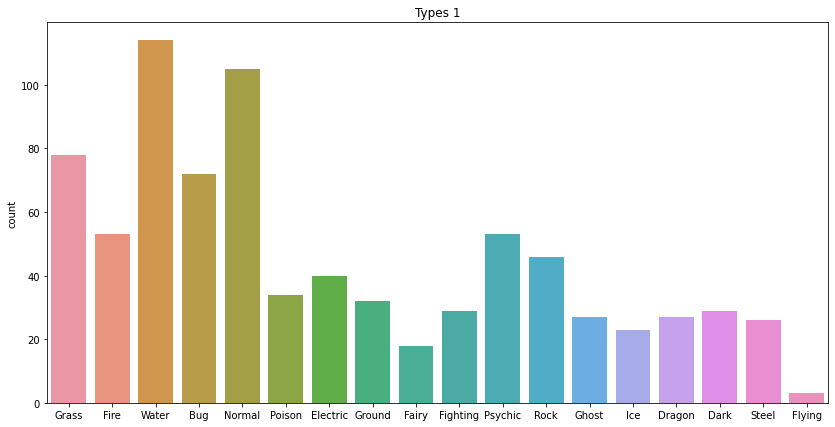

In [ ]:
type1 = data['Type1'].tolist()
type2 = data['Type2'].tolist()
plt.figure(figsize=(14, 7))
sns.countplot(x=type1)
plt.title('Types 1')
plt.show()


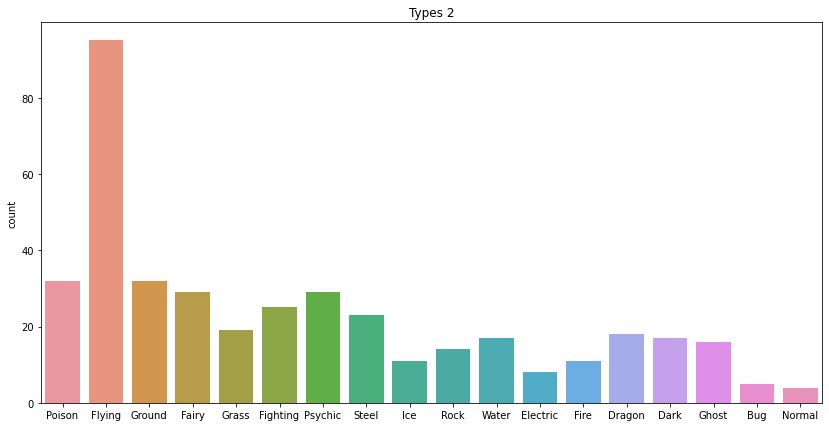

In [ ]:
plt.figure(figsize=(14, 7))
sns.countplot(x=type2)
plt.title('Types 2')
plt.show()


## 타입 2에 Null값이 많아 Type 1 로만 훈련

In [ ]:
pokedex = "images/images/"
filenames = os.listdir(pokedex)
pnames, ptypes = [],[]

def get_row(df,col,name):
    return df[df[col]==name]

for path in os.listdir(pokedex):
    name = re.search(r"^([^.]*).*", path).group(1)
    pnames.append(name.capitalize())
    ptypes.append(data['Type1'][int(get_row(data,'Name',name).index.values)]) 
        
N_IMAGES = len(filenames)
print("Number of pokemon: ", N_IMAGES)

lst1 = filenames
lst2 = pnames
lst3 = ptypes 
pokemon_data = pd.DataFrame({'Filename':lst1,'Pokemon':lst2, 'Primary Type':lst3})

Number of pokemon:  809


In [ ]:
pokemon_data

,Filename,Pokemon,Primary Type
0,ponyta.png,Ponyta,Fire
1,poliwrath.png,Poliwrath,Water
2,samurott.png,Samurott,Water
3,claydol.png,Claydol,Ground
4,caterpie.png,Caterpie,Bug
...,...,...,...
804,whiscash.png,Whiscash,Water
805,seedot.png,Seedot,Grass
806,kabutops.png,Kabutops,Rock
807,aromatisse.png,Aromatisse,Fairy


In [ ]:
pokemon_data.head()
# Find all types with group sizes greater than 40 
ptypes = pokemon_data['Primary Type']
g40 = [el for el in ptypes.value_counts()[ptypes.value_counts()>40].index]
display(g40 )

df=pd.DataFrame([],columns=pokemon_data.columns)
for el in g40:
    data = pokemon_data.set_index('Primary Type').loc[el].reset_index()
    df = df.append(data)
df

['Water', 'Normal', 'Grass', 'Bug', 'Fire', 'Psychic', 'Rock']

,Filename,Pokemon,Primary Type
0,poliwrath.png,Poliwrath,Water
1,samurott.png,Samurott,Water
2,phione.png,Phione,Water
3,politoed.png,Politoed,Water
4,clamperl.png,Clamperl,Water
...,...,...,...
41,stakataka.jpg,Stakataka,Rock
42,tyrunt.png,Tyrunt,Rock
43,binacle.png,Binacle,Rock
44,nihilego.jpg,Nihilego,Rock


In [ ]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])    

train, valid, test = train.reset_index(), valid.reset_index(), test.reset_index()
display(train,valid,test)

,index,Filename,Pokemon,Primary Type
0,43,binacle.png,Binacle,Rock
1,44,nihilego.jpg,Nihilego,Rock
2,3,pupitar.png,Pupitar,Rock
3,9,aurorus.png,Aurorus,Rock
4,39,ralts.png,Ralts,Psychic
...,...,...,...,...
307,6,lileep.png,Lileep,Rock
308,34,graveler.png,Graveler,Rock
309,7,carbink.png,Carbink,Rock
310,40,jigglypuff.png,Jigglypuff,Normal


,index,Filename,Pokemon,Primary Type
0,2,shieldon.png,Shieldon,Rock
1,83,wingull.png,Wingull,Water
2,73,hoppip.png,Hoppip,Grass
3,36,bunnelby.png,Bunnelby,Normal
4,93,alomomola.png,Alomomola,Water
...,...,...,...,...
99,104,wishiwashi-solo.jpg,Wishiwashi-solo,Water
100,51,munna.png,Munna,Psychic
101,10,wooper.png,Wooper,Water
102,105,tentacool.png,Tentacool,Water


,index,Filename,Pokemon,Primary Type
0,90,tirtouga.png,Tirtouga,Water
1,100,seismitoad.png,Seismitoad,Water
2,4,heatmor.png,Heatmor,Fire
3,11,litleo.png,Litleo,Fire
4,32,rockruff.jpg,Rockruff,Rock
...,...,...,...,...
100,78,quagsire.png,Quagsire,Water
101,49,shuckle.png,Shuckle,Bug
102,27,charizard.png,Charizard,Fire
103,20,magmortar.png,Magmortar,Fire


Found 312 validated image filenames belonging to 7 classes.
Found 104 validated image filenames belonging to 7 classes.
Found 105 validated image filenames belonging to 7 classes.


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


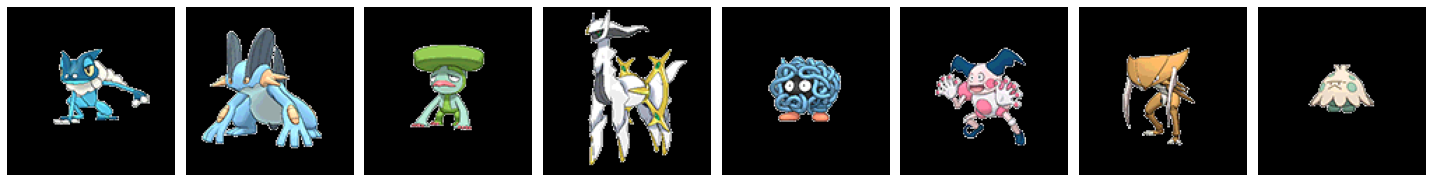

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 32 using train_datagen generator
train_generator = datagen.flow_from_dataframe(
dataframe=train,
directory="images/images/",
x_col="Filename",
y_col="Primary Type",
subset="training",
batch_size=100,
seed=19,
shuffle=True,
class_mode="categorical",
target_size=(120,120))

valid_generator = datagen.flow_from_dataframe(
dataframe=valid,
directory="images/images/",
x_col="Filename",
y_col="Primary Type",
subset="training",
batch_size=100,
seed=102,
shuffle=True,
class_mode="categorical",
target_size=(120,120))

test_generator = datagen.flow_from_dataframe(
dataframe=test,
directory="images/images/",
x_col="Filename",
y_col="Primary Type",
subset="training",
batch_size=100,
seed=0,
shuffle=True,
class_mode="categorical",
target_size=(120,120))


### CHECK if images are correct
sample_training_images, _ = next(train_generator)

# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 8, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

plotImages(sample_training_images[:8])

# Resnet 모델 사용 - 7종류 분류

In [ ]:
res_net = ResNet101(weights='imagenet', 
                  include_top=False, 
                  input_shape=(120, 120, 3))

In [ ]:
res_net.trainable = False
res_net.summary()

Model: "resnet101"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 126, 126, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 60, 60, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 60, 60, 64)   256         ['conv1_conv[0][0]']     

In [ ]:
for layer in res_net.layers[:4]:
    layer.trainable = True

In [ ]:
model = Sequential()
model.add(res_net)
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(7))
model.add(Activation('sigmoid'))

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(lr=1e-3), metrics = ['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101 (Functional)      (None, 4, 4, 2048)        42658176  
                                                                 
 flatten_4 (Flatten)         (None, 32768)             0         
                                                                 
 dense_16 (Dense)            (None, 1024)              33555456  
                                                                 
 activation_16 (Activation)  (None, 1024)              0         
                                                                 
 dense_17 (Dense)            (None, 512)               524800    
                                                                 
 activation_17 (Activation)  (None, 512)               0         
                                                                 
 dense_18 (Dense)            (None, 256)              

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(train_generator, epochs=50, verbose=2,validation_data = valid_generator)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Epoch 1/50
4/4 - 13s - loss: 21.9280 - accuracy: 0.1827 - val_loss: 2.1131 - val_accuracy: 0.1346 - 13s/epoch - 3s/step
Epoch 2/50
4/4 - 1s - loss: 16.2968 - accuracy: 0.1891 - val_loss: 1.9257 - val_accuracy: 0.2308 - 952ms/epoch - 238ms/step
Epoch 3/50
4/4 - 1s - loss: 7.6497 - accuracy: 0.2724 - val_loss: 1.9555 - val_accuracy: 0.1346 - 934ms/epoch - 233ms/step
Epoch 4/50
4/4 - 1s - loss: 3.9833 - accuracy: 0.3013 - val_loss: 1.8923 - val_accuracy: 0.2404 - 978ms/epoch - 244ms/step
Epoch 5/50
4/4 - 1s - loss: 2.9604 - accuracy: 0.3429 - val_loss: 1.9338 - val_accuracy: 0.2212 - 966ms/epoch - 242ms/step
Epoch 6/50
4/4 - 1s - loss: 2.0785 - accuracy: 0.4199 - val_loss: 1.9347 - val_accuracy: 0.2404 - 933ms/epoch - 233ms/step
Epoch 7/50
4/4 - 1s - loss: 1.6035 - accuracy: 0.4647 - val_loss: 1.9415 - val_accuracy: 0.1442 - 938ms/epoch - 234ms/step
Epoch 8/50
4/4 - 1s - loss: 1.5649 - accuracy: 0.4872 - val_loss: 1.9395 - val_accuracy: 0.1250 - 994ms/epoch - 248ms/step
Epoch 9/50
4/4 - 1

## Resnet사용 - 3종류 분류

In [ ]:
pokemon_data.head()
# Find all types with group sizes greater than 40 
ptypes = pokemon_data['Primary Type']
g40 = [el for el in ptypes.value_counts()[ptypes.value_counts()>75].index]
display(g40 )

df=pd.DataFrame([],columns=pokemon_data.columns)
for el in g40:
    data = pokemon_data.set_index('Primary Type').loc[el].reset_index()
    df = df.append(data)
df

['Water', 'Normal', 'Grass']

,Filename,Pokemon,Primary Type
0,poliwrath.png,Poliwrath,Water
1,samurott.png,Samurott,Water
2,phione.png,Phione,Water
3,politoed.png,Politoed,Water
4,clamperl.png,Clamperl,Water
...,...,...,...
73,hoppip.png,Hoppip,Grass
74,sceptile.png,Sceptile,Grass
75,steenee.jpg,Steenee,Grass
76,leafeon.png,Leafeon,Grass


In [ ]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])    

train, valid, test = train.reset_index(), valid.reset_index(), test.reset_index()
display(train,valid,test)

,index,Filename,Pokemon,Primary Type
0,46,dewpider.jpg,Dewpider,Water
1,55,horsea.png,Horsea,Water
2,17,cacturne.png,Cacturne,Grass
3,17,wigglytuff.png,Wigglytuff,Normal
4,56,poliwag.png,Poliwag,Water
...,...,...,...,...
173,13,starly.png,Starly,Normal
174,23,dewgong.png,Dewgong,Water
175,76,ursaring.png,Ursaring,Normal
176,4,simisage.png,Simisage,Grass


,index,Filename,Pokemon,Primary Type
0,67,turtwig.png,Turtwig,Grass
1,30,roselia.png,Roselia,Grass
2,62,pidgeot.png,Pidgeot,Normal
3,96,tranquill.png,Tranquill,Normal
4,74,meloetta-aria.png,Meloetta-aria,Normal
5,57,regigigas.png,Regigigas,Normal
6,84,oranguru.jpg,Oranguru,Normal
7,7,gumshoos.jpg,Gumshoos,Normal
8,35,porygon.png,Porygon,Normal
9,64,clauncher.png,Clauncher,Water


,index,Filename,Pokemon,Primary Type
0,88,meowth.png,Meowth,Normal
1,107,manaphy.png,Manaphy,Water
2,30,skitty.png,Skitty,Normal
3,93,alomomola.png,Alomomola,Water
4,55,exeggutor.png,Exeggutor,Grass
5,29,skiddo.png,Skiddo,Grass
6,26,araquanid.jpg,Araquanid,Water
7,14,tsareena.jpg,Tsareena,Grass
8,32,deerling.png,Deerling,Normal
9,39,munchlax.png,Munchlax,Normal


Found 178 validated image filenames belonging to 3 classes.
Found 59 validated image filenames belonging to 3 classes.
Found 60 validated image filenames belonging to 3 classes.


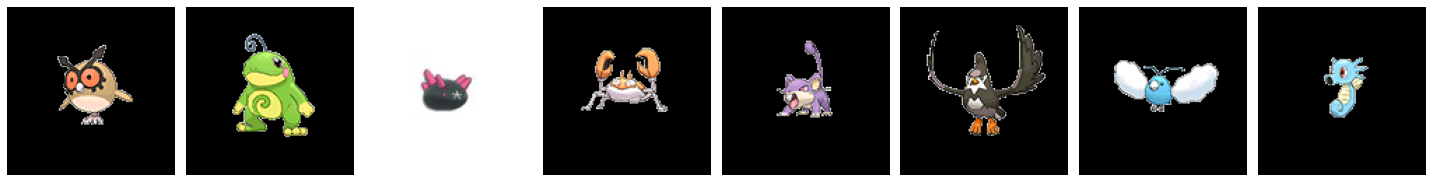

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 32 using train_datagen generator
train_generator = datagen.flow_from_dataframe(
dataframe=train,
directory="images/images/",
x_col="Filename",
y_col="Primary Type",
subset="training",
batch_size=8,
seed=19,
shuffle=True,
class_mode="categorical",
target_size=(120,120))

valid_generator = datagen.flow_from_dataframe(
dataframe=valid,
directory="images/images/",
x_col="Filename",
y_col="Primary Type",
subset="training",
batch_size=8,
seed=102,
shuffle=True,
class_mode="categorical",
target_size=(120,120))

test_generator = datagen.flow_from_dataframe(
dataframe=test,
directory="images/images/",
x_col="Filename",
y_col="Primary Type",
subset="training",
batch_size=8,
seed=0,
shuffle=True,
class_mode="categorical",
target_size=(120,120))


### CHECK if images are correct
sample_training_images, _ = next(train_generator)

# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 8, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

plotImages(sample_training_images[:8])

In [ ]:
res_net = ResNet101(weights='imagenet', 
                  include_top=False, 
                  input_shape=(120, 120, 3))

In [ ]:
res_net.trainable = False
res_net.summary()

Model: "resnet101"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 126, 126, 3)  0           ['input_7[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 60, 60, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 60, 60, 64)   256         ['conv1_conv[0][0]']     

In [ ]:
for layer in res_net.layers[:4]:
    layer.trainable = True

In [ ]:
model = Sequential()
model.add(res_net)
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('sigmoid'))

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(lr=1e-3), metrics = ['accuracy'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101 (Functional)      (None, 4, 4, 2048)        42658176  
                                                                 
 flatten_7 (Flatten)         (None, 32768)             0         
                                                                 
 dense_28 (Dense)            (None, 1024)              33555456  
                                                                 
 activation_28 (Activation)  (None, 1024)              0         
                                                                 
 dense_29 (Dense)            (None, 512)               524800    
                                                                 
 activation_29 (Activation)  (None, 512)               0         
                                                                 
 dense_30 (Dense)            (None, 256)              

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(train_generator, epochs=50, verbose=2,validation_data = valid_generator)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


23/23 - 9s - loss: 24.4206 - accuracy: 0.3876 - val_loss: 2.7436 - val_accuracy: 0.2712 - 9s/epoch - 381ms/step
Epoch 2/50
23/23 - 1s - loss: 11.3973 - accuracy: 0.4607 - val_loss: 1.1994 - val_accuracy: 0.3051 - 1s/epoch - 47ms/step
Epoch 3/50
23/23 - 1s - loss: 3.0768 - accuracy: 0.5955 - val_loss: 1.2818 - val_accuracy: 0.2712 - 1s/epoch - 47ms/step
Epoch 4/50
23/23 - 1s - loss: 2.4156 - accuracy: 0.6685 - val_loss: 1.1684 - val_accuracy: 0.3559 - 1s/epoch - 47ms/step
Epoch 5/50
23/23 - 1s - loss: 1.2816 - accuracy: 0.7191 - val_loss: 1.2234 - val_accuracy: 0.2881 - 1s/epoch - 46ms/step
Epoch 6/50
23/23 - 1s - loss: 0.9723 - accuracy: 0.7753 - val_loss: 1.1752 - val_accuracy: 0.2881 - 1s/epoch - 47ms/step
Epoch 7/50
23/23 - 1s - loss: 0.5945 - accuracy: 0.8202 - val_loss: 1.1086 - val_accuracy: 0.3051 - 1s/epoch - 47ms/step
Epoch 8/50
23/23 - 1s - loss: 0.4123 - accuracy: 0.8596 - val_loss: 1.1574 - val_accuracy: 0.2881 - 1s/epoch - 47ms/step
Epoch 9/50
23/23 - 1s - loss: 0.4225 - a

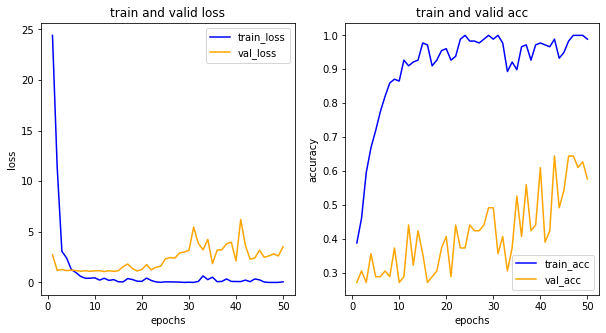

In [ ]:
his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss)+1)
fig = plt.figure(figsize = (10,5))

# train/valid/loss graph
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and valid loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['accuracy']
val_acc = his_dict['val_accuracy']

# train/valid/loss acc
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and valid acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('accuracy')
ax2.legend()

plt.show()